In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import sys, os
from azureml.core import Run, Experiment, Workspace, Datastore, Dataset

In [3]:
!pip install mpld3
!pip install "git+https://github.com/javadba/mpld3@display_fix"
import mpld3
from mpld3 import plugins
fig, ax = plt.subplots()
a= [1,2,3]
ax.plot(a, "-o", markersize=2)
plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()

     |████████████████████████████████| 1.0 MB 11.9 MB/s eta 0:00:01
  Created wheel for mpld3: filename=mpld3-0.5.1-py3-none-any.whl size=364063 sha256=76c7ed5c68ec00d122a0c4bc86a191e33f68dbff0d08bf55f11c2b160efe26dd
  Stored in directory: /home/azureuser/.cache/pip/wheels/10/e6/43/1f44161241cff24a384d80e29ca0986e51ca0e53ea07ed0ea9
Successfully built mpld3
  Cloning https://github.com/javadba/mpld3 (to revision display_fix) to /tmp/pip-req-build-1gr4bc4r
  Running command git clone -q https://github.com/javadba/mpld3 /tmp/pip-req-build-1gr4bc4r
  Running command git checkout -b display_fix --track origin/display_fix
  Switched to a new branch 'display_fix'
  Branch display_fix set up to track remote branch display_fix from origin.
  Running command git submodule update --init --recursive -q
  Created wheel for mpld3: filename=mpld3-0.3.1.dev1-py3-none-any.whl size=116958 sha256=a1a8d4ec83151484c453aac10da7798f12356ea52a8ad14686015a46cc5e3e1c
  Stored in directory: /tmp/pip-ephem-wheel

# Load PRS merged data

## raw data

In [4]:
from azureml.core import Workspace
ws = Workspace.from_config()
datastore = ws.get_default_datastore()
path_on_datastore = "datasets/trades_raw_sample"
# path_on_datastore = "datasets/trades_merged_sample"

In [6]:
trades_raw_dataset = Dataset.File.from_files(
    (
        datastore,
        path_on_datastore,
    ),
    validate=True,
).mount()
trades_raw_dataset.start()

In [14]:
os.listdir(trades_raw_dataset.mount_point)
# trades_raw_dataset.stop()

In [10]:
df = pd.read_csv(os.path.join(trades_raw_dataset.mount_point, '2017-02-19.csv.gz'), compression='gzip')

## merged data

In [82]:
path_on_datastore = "datasets/trades_merged_sample_11"
trades_merged_dataset = Dataset.File.from_files(
    (
        datastore,
        path_on_datastore,
    ),
    validate=True,
).mount()
trades_merged_dataset.start()

In [83]:
traded_merged_files_list = os.listdir(trades_merged_dataset.mount_point)
print(traded_merged_files_list)

['2017-02-10-mts.csv', '2017-02-13-mts.csv', '2017-02-14-mts.csv', '2017-02-15-mts.csv', '2017-02-16-mts.csv', '2017-02-17-mts.csv', 'trades_outputs.txt']


In [85]:
i=1
print(traded_merged_files_list[i])
traded_merged_df = pd.read_csv(os.path.join(trades_merged_dataset.mount_point, traded_merged_files_list[i]))

2017-02-13-mts.csv


In [87]:
traded_merged_df.shape

(852, 6)

In [59]:
trades_merged_dataset.stop

<bound method MountContext.stop of <azureml.dataprep.fuse.daemon.MountContext object at 0x7eff08b6d2e8>>

In [49]:
trades_merged_dataset.stop()

In [2]:
traded_merged_df = pd.read_csv("../../data/quotes_merged_mp/2017-01-09-mt.csv")

In [3]:
traded_merged_df.shape

(504070, 9)

In [4]:
traded_merged_df.tail()

,Date-Time,Bid Price,Ask Price,Bid Size,Ask Size,Seq. No.,Exch Time,#RIC,dailyVolatility
504065,2017-01-09 23:59:59.317932575-06:00,2260.75,2261.0,54.0,66.0,2456865,05:59:59.311000000,ESH7,1
504066,2017-01-09 23:59:59.870001625-06:00,2260.75,2261.0,54.0,63.0,2456868,05:59:59.861000000,ESH7,1
504067,2017-01-09 23:59:59.938035500-06:00,2260.75,2261.0,65.0,63.0,2456869,05:59:59.933000000,ESH7,1
504068,2017-01-09 23:59:59.938296508-06:00,2260.75,2261.0,65.0,62.0,2456871,05:59:59.933000000,ESH7,1
504069,2017-01-09 23:59:59.942034338-06:00,2260.75,2261.0,65.0,59.0,2456872,05:59:59.935000000,ESH7,1


# Visualization

In [4]:
path_to_labeled = '../../bars_2018-03-26-mqs.pkl'
path_to_merged = '../../2018-03-26-mqs.pkl'
# path_to_labeled = '../../data/test/merge/2017-02-10.pkl'
merged_df = pd.read_pickle(path_to_merged)
merged_df.reset_index(level=0, inplace=True)
bars_df = pd.read_pickle(path_to_labeled)

In [5]:
print(merged_df.shape)
print(bars_df.shape)

(3917, 10)
(5, 17)


In [6]:
bars_df

,original_index,Date-Time,Bid Price,Ask Price,Bid Size,Ask Size,Seq. No.,Exch Time,#RIC,dailyVolatility,pt_long_ind,sl_long_ind,pt_short_ind,sl_short_ind,end_ind,long_label,short_label
0,1399,2018-03-26 00:13:49.765682937-05:00,2611.50,2611.50,98.0,131.0,716583,05:13:49.586000000,ESM8,1.028243,1514.0,NaN,NaN,1422.0,2733.0,1,-1
1,2653,2018-03-26 00:23:19.325985921-05:00,2614.00,2614.25,24.0,22.0,726242,05:23:19.318000000,ESM8,1.028243,2746.0,NaN,NaN,2747.0,3916.0,1,-1
2,3026,2018-03-26 00:25:31.848610672-05:00,2617.00,2618.00,4.0,82.0,729033,05:25:31.824000000,ESM8,1.028243,3031.0,3095.0,3029.0,3422.0,3916.0,1,1
3,3057,2018-03-26 00:25:31.873033724-05:00,2618.00,2618.25,53.0,56.0,729717,05:25:31.844000000,ESM8,1.028243,3480.0,3070.0,3069.0,3480.0,3916.0,-1,1
4,3458,2018-03-26 00:25:35.578865996-05:00,2618.25,2618.50,26.0,28.0,733599,05:25:35.571000000,ESM8,1.028243,3502.0,3686.0,3685.0,3503.0,3916.0,1,-1


In [5]:
start_time = '2018-03-26 00:00:01.149905303-05:00'
end_time = '2018-03-26 00:25:35.578865996-05:00'

In [6]:
merged_df = merged_df[merged_df['Date-Time']>start_time]
merged_df = merged_df[merged_df['Date-Time']<end_time]
bars_df = bars_df[bars_df['Date-Time']>start_time]
bars_df = bars_df[bars_df['Date-Time']<end_time]

In [7]:
print(merged_df.shape)
print(bars_df.shape)

(3454, 10)
(4, 14)


In [8]:
import mpld3
from mpld3 import plugins
fig, ax = plt.subplots()
a= [1,2,3]
ax.plot(a, "-o", markersize=2)
plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()

In [4]:
def plot_barriers(i, df, pt_level=0.0001, sl_level=0.0001):
#     print(df.loc[i,'Bid Price']*np.array([1+pt_level,1-sl_level]), df.loc[i,'Date-Time'])
#     print(df.loc[i,'Price']*np.array([1+pt_level,1-sl_level]), df.loc[i,'Date-Time'], df.loc[merged_df.loc[i,'Date-Time']])
#     plt.hlines(df.loc[i,'Price']*np.array([1+pt_level,1-sl_level]), xmin=df.loc[i,'Date-Time'], xmax=df.loc[df.loc[i,'end_ind'],'Date-Time'], color='r', linestyles='--')
    c=['k','b','r'][df.loc[i,'label']]
#     print(df.loc[i,'label'], c)
    plt.hlines(df.loc[i,'Bid Price']*np.array([1+pt_level,1-sl_level]), xmin=df.loc[i,'Date-Time'], xmax=merged_df.loc[int(df.loc[i,'end_ind']),'Date-Time'], color=c, linestyles='--')
    plt.vlines(x = [df.loc[i,'Date-Time'], merged_df.loc[int(df.loc[i,'end_ind']),'Date-Time']], ymin=df.loc[i,'Bid Price']*(1-sl_level), ymax=df.loc[i,'Bid Price']*(1+pt_level), color=c, linestyles='--')
# plot_barriers(i, bars_df)

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))


a=[1,2,3]
ax.plot(merged_df['Date-Time'], merged_df['Bid Price'], "-ro", markersize=2)
ax.plot(merged_df['Date-Time'], merged_df['Ask Price'], "-bo", markersize=2)
for i in range(0,len(bars_df)):
#     print(i)
    plot_barriers(i, bars_df)
# plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display();

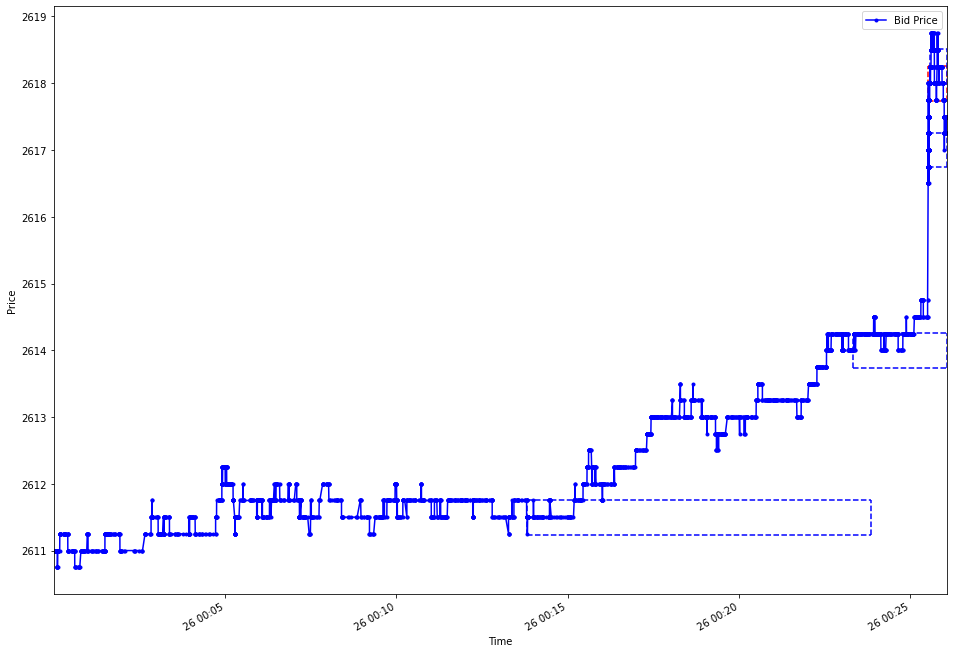

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))

merged_df.plot(x='Date-Time', y='Bid Price', style='.-', color='b', figsize=(16,12),ax=ax)
# merged_df.plot(x='Date-Time', y='Ask Price', style='.-', color='r', figsize=(16,12), ax=ax)
# merged_df.plot(y='Price', style='.', figsize=(16,12))
plt.xlabel("Time")
plt.ylabel("Price")

for i in range(0,len(bars_df)):
#     print(i)
    plot_barriers(i, bars_df)
plt.show();

In [10]:
bars_df.loc[300]

KeyError: 300

In [14]:
path_to_har = '/home/erfan/Dropbox/Futures_ML_Project/output/clean_data/ES/RV_Erfan.csv'
df_har_data = pd.read_csv(path_to_har)

FileNotFoundError: [Errno 2] File b'/home/erfan/Dropbox/Futures_ML_Project/output/clean_data/ES/RV_Erfan.csv' does not exist: b'/home/erfan/Dropbox/Futures_ML_Project/output/clean_data/ES/RV_Erfan.csv'

In [33]:
df_har_data['Date[L]']=='2017-01-01'

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888    False
889    False
890    False
891    False
892    False
893    False
894    False
895    False
896    False
897    False
898    False
899    False
900    False
901    False
902    False
903    False
904    False
905    False
906    False
907    False
908    False
909    False
910    False
Name: Date[L], Length: 911, dtype: bool

In [30]:
a

2813.7808700571723

In [10]:
from sklearn import preprocessing
standarize = lambda x: (x-x.mean()) / x.std()

In [16]:
df_har_data['Standard HAR (Log RV) 1-Month'] = df_har_data['HAR (Log RV) 1-Month'].pipe(standarize)+1

In [17]:
df_har_data['Standard HAR (Log RV) 1-Month'].tail()

906    1.579343
907    1.373412
908    0.868043
909    1.113695
910    1.062978
Name: Standard HAR (Log RV) 1-Month, dtype: float64

In [2]:
def select_first_file(path):
    """Selects first file in folder, use under assumption there is only one file in folder

    Args:
        path (str): path to directory or file to choose

    Raises:
        ValueError: error raised when there are multiple files in the directory

    Returns:
        str: full path of selected file
    """
    if os.path.isfile(path):
        # log(logging.INFO, DataCategory.ONLY_PUBLIC_DATA, "Input is file, selecting {}".format(path))
        return path

    files = os.listdir(path)
    # log(logging.INFO, DataCategory.ONLY_PUBLIC_DATA, "Found {} in {}".format(files, path))
    if len(files) != 1:
        raise ValueError("expected exactly one file in directory")
    # log(logging.INFO, DataCategory.ONLY_PUBLIC_DATA, "Selecting {}".format(files[0]))
    return os.path.join(path, files[0])

In [68]:
a = [1,23]
b=[2]
b.extend(a)

In [69]:
b

['2', '1', '23']

In [71]:
'/home/ali/code/data/Futures_ML_Project/output/raw_data/'